# Nivell 1
#### Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Desktop/DataScience/datasets/DelayedFlights/DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [245]:
df.UniqueCarrier.value_counts(normalize=True)[0:5]

WN    0.194966
AA    0.099065
MQ    0.073277
UA    0.073022
OO    0.068379
Name: UniqueCarrier, dtype: float64

**Una variable categòrica (UniqueCarrier)**

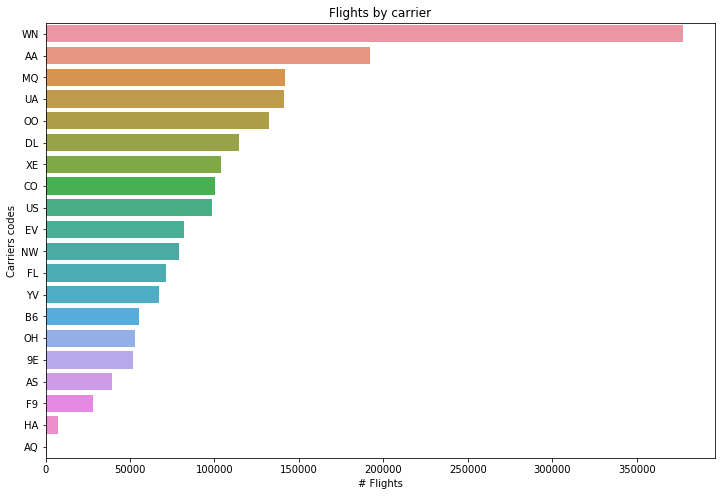

In [246]:
#Una variable categòrica (UniqueCarrier)
plt.figure(figsize=(12,8))
sns.countplot(y=df.UniqueCarrier,order = df.UniqueCarrier.value_counts().index)
plt.title('Flights by carrier')
plt.xlabel('# Flights')
plt.ylabel('Carriers codes')
plt.savefig('flights by carrier.png')
plt.show()

In [30]:
df.UniqueCarrier.value_counts(normalize=True)[0:5]

WN    0.194966
AA    0.099065
MQ    0.073277
UA    0.073022
OO    0.068379
Name: UniqueCarrier, dtype: float64

La compañía que más vuelos realiza es, con diferencia, WN ([Southwest Airlines](https://en.wikipedia.org/wiki/Southwest_Airlines)) con un 20% del total, seguida de AA ([American Airlines](https://en.wikipedia.org/wiki/American_Airlines)) con un 10%. A cierta distancia se encuentran, con porcentajes parecidos, entorno al 7%, MQ, actual ([American Eagle](https://en.wikipedia.org/wiki/American_Eagle_\(airline_brand\))) filial de American Airlines, UA ([United Airlines](https://en.wikipedia.org/wiki/United_Airlines)) y OO ([Sky West](https://en.wikipedia.org/wiki/SkyWest_Airlines))

**Una variable numèrica (ArrDelay)**

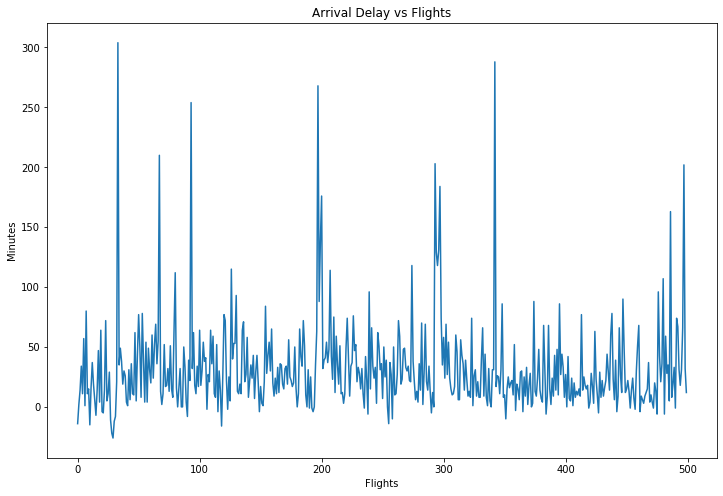

In [274]:
#Una variable numèrica (ArrDelay), 500 vuelos
plt.figure(figsize=(12,8))
x=df.ArrDelay[0:500]
plt.plot(range(len(x)),x)
plt.title('Arrival Delay vs Flights')
plt.xlabel('Flights')
plt.ylabel('Minutes')
plt.savefig('arrdelay.png')
plt.show()

Hemos seleccionado los primeros 500 vuelos para poder visualizar mejor la gráfica. Vemos que hay una media de retraso entorno a 45 minutos y cada cierto tiempo aparecen vuelos con un elevado retraso (outliers)

**Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**

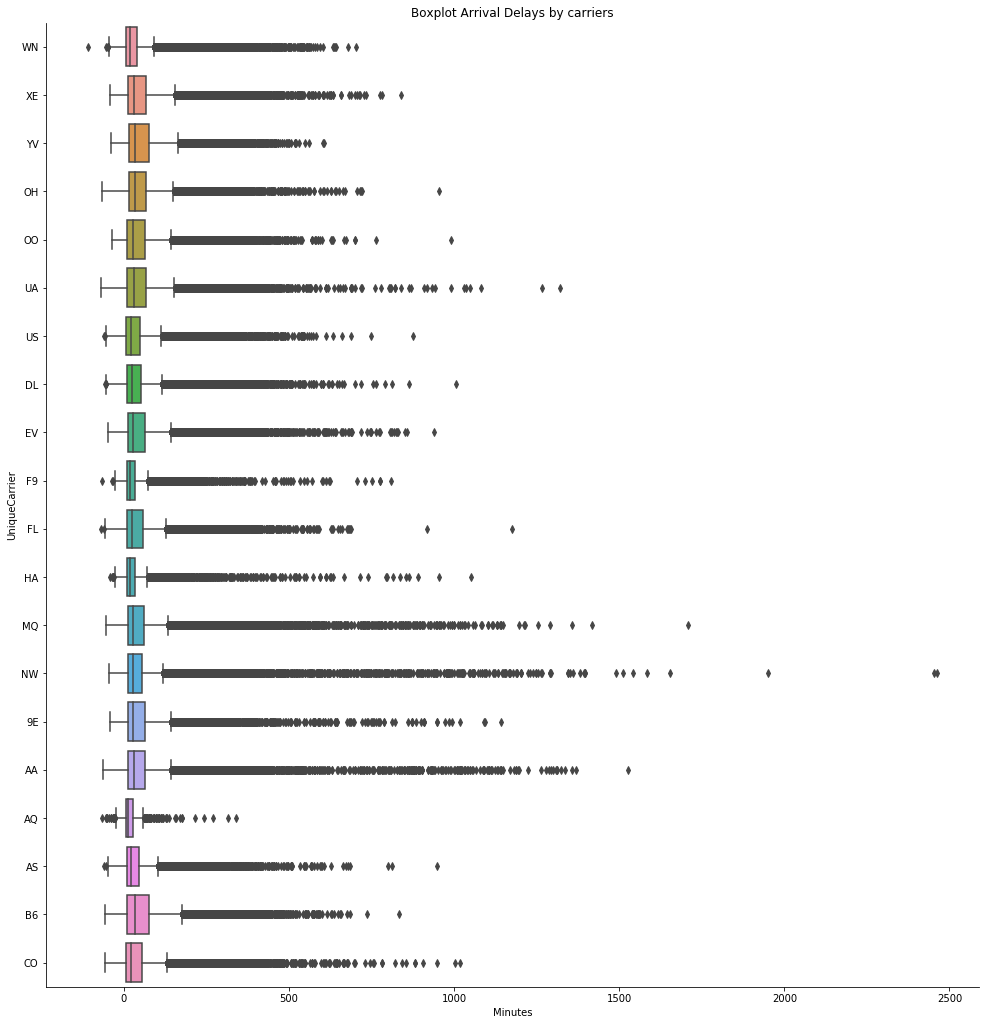

In [248]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
g=sns.catplot(y="UniqueCarrier",x='ArrDelay',data=df,kind="box")
g.fig.set_size_inches(15,15)
plt.xlabel('Minutes')
plt.title('Boxplot Arrival Delays by carriers')
plt.savefig('boxplot arrDelay by carrier.png')
plt.show()

In [155]:
df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values()[0:5]

UniqueCarrier
AQ    21.255376
F9    27.938953
WN    30.087884
HA    34.209449
AS    36.060882
Name: ArrDelay, dtype: float64

Desglosamos la variable ArrDelay por compañías aéreas (UniqueCarrier). Vemos que existen muchos outliers en todos los casos. De todas las compañías, podemos destacar AQ ([Aloha Airlines](https://en.wikipedia.org/wiki/Aloha_Airlines)), es la que mejor cumple con los tiempos de llegada estimados. Tiene la media más baja, aunque son 21 minutos!!! y  una dispersión de datos muy pequeña, IQR=Q3-Q1, además es la que tiene menos outliers superiores aunque más outliers inferiores.

**Dues variables numèriques (ArrDelay i DepDelay)**

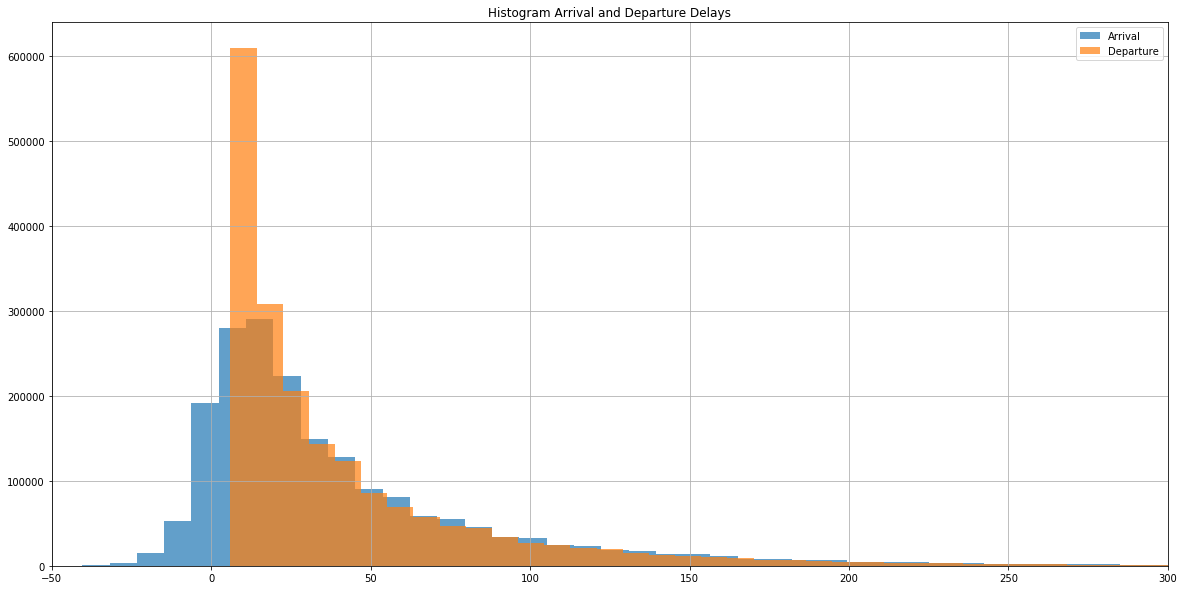

In [275]:
#Dues variables numèriques (ArrDelay i DepDelay)
plt.figure(figsize=(20,10))
df.ArrDelay.hist(alpha=0.7, bins=300)
df.DepDelay.hist(alpha=0.7,bins=300)
plt.legend(['Arrival','Departure'])
plt.xlim(-50,300)
plt.title('Histogram Arrival and Departure Delays')
plt.savefig('hist arrDelay depDelay.png')
plt.show()

In [265]:
df[['ArrDelay','DepDelay']].describe()

,ArrDelay,DepDelay
count,1.928371e+06,1.936758e+06
mean,4.219988e+01,4.318518e+01
std,5.678472e+01,5.340250e+01
min,-1.090000e+02,6.000000e+00
25%,9.000000e+00,1.200000e+01
50%,2.400000e+01,2.400000e+01
75%,5.600000e+01,5.300000e+01
max,2.461000e+03,2.467000e+03


Por los dos histogramas de ArrDelay y DepDelay podemos ver un comportamiento distinto en la cola de la izquierda pero casi idéntico en la derecha. Vemos la asimetría debida a la gran cantidad de outliers que hay y que comentamos en la gráfica anterior.
En las salidas el retraso mínimo es de 6 minutos mientras que en las llegadas, hay vuelos que llegan en el tiempo estimado e incluso antes de este, lo que sugiere que los aviones intentan reducir el tiempo de retraso durante el vuelo.

**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

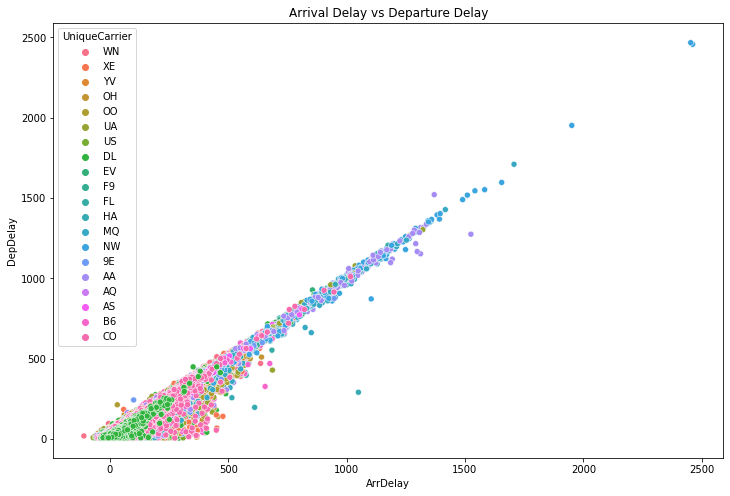

In [250]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.ArrDelay,y=df.DepDelay,hue=df.UniqueCarrier)
plt.title('Arrival Delay vs Departure Delay')
plt.savefig('scatter arrdelay depdelay by carrier.png')
plt.show()

Vemos que existe una fuerte correlacion entre las dos variables ArrDelay y DepDelay, lo comprobamos:

In [233]:
df_corr=df[['ArrDelay','DepDelay']]
df_corr.corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952927
DepDelay,0.952927,1.000000


**Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).**

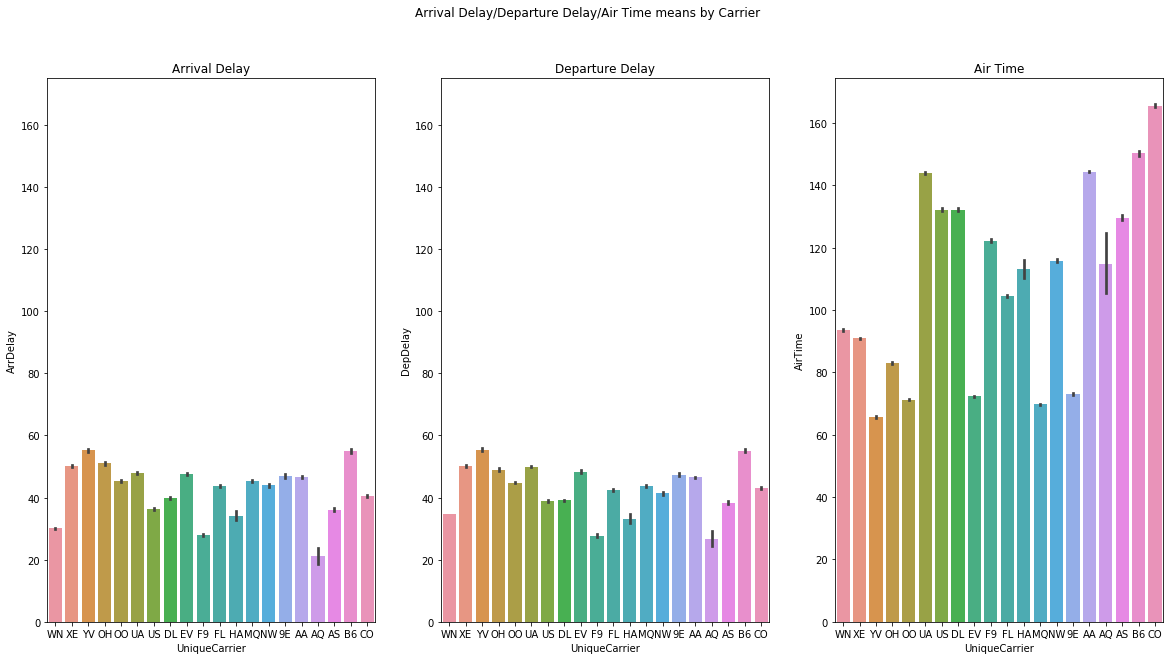

In [5]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
ax=plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
ax=sns.barplot(x=df.UniqueCarrier,y=df.ArrDelay)
plt.title('Arrival Delay')
plt.ylim(0,175)
plt.subplot(1,3,2)
ax=sns.barplot(x=df.UniqueCarrier,y=df.DepDelay)
plt.title('Departure Delay')
plt.ylim(0,175)
plt.subplot(1,3,3)
sns.barplot(x=df.UniqueCarrier,y=df.AirTime)
plt.title('Air Time')
plt.suptitle('Arrival Delay/Departure Delay/Air Time means by Carrier')
plt.savefig('barplots arrdelay depdelay airtime by carrier.png')
plt.show()

Vemos que los tiempos medios de salida (DepDelay) y llegada (ArrDelay) por aerolínea son casi idénticos.AQ ([Aloha Airlines](https://en.wikipedia.org/wiki/Aloha_Airlines)) es la que mejor comportamiento tiene como comentamos anteriormente. En cambio B6 ([Jet Blue](https://es.wikipedia.org/wiki/JetBlue_Airways)) y YV ([Mesa Airlines](https://es.wikipedia.org/wiki/Mesa_Airlines)) son las que tienen peor retraso llegando casi a la hora.
        En la tercera gráfica, vemos que la compañía que está más tiempo en el aire de media es CO ([Continental Airlines](https://es.wikipedia.org/wiki/Continental_Airlines)) superando los 160 minutos de vuelo.

#### Exercici 2
Exporta els gràfics com imatges o com html.

He guardado los gráficos como png con la orden **plt.savefig('plot name.png')**

#### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [241]:
#Eliminamos los null
df.dropna(inplace=True)
df.to_csv('df_processed_tasca6.csv', index=False)
df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

#### Exercici 4
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

He añadido las gráficas al notebook de la tasca 5.